# Problem Statement

X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Importing the data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# imporing the data
conv_data= pd.read_csv('Leads.csv')

In [3]:
conv_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Inspecting the dataset

In [4]:
# checkn dimensions of the data
conv_data.shape

(9240, 37)

In [5]:
# checking statistical aspects of the data
conv_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# checking type of each columns
conv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Checking the collinearity

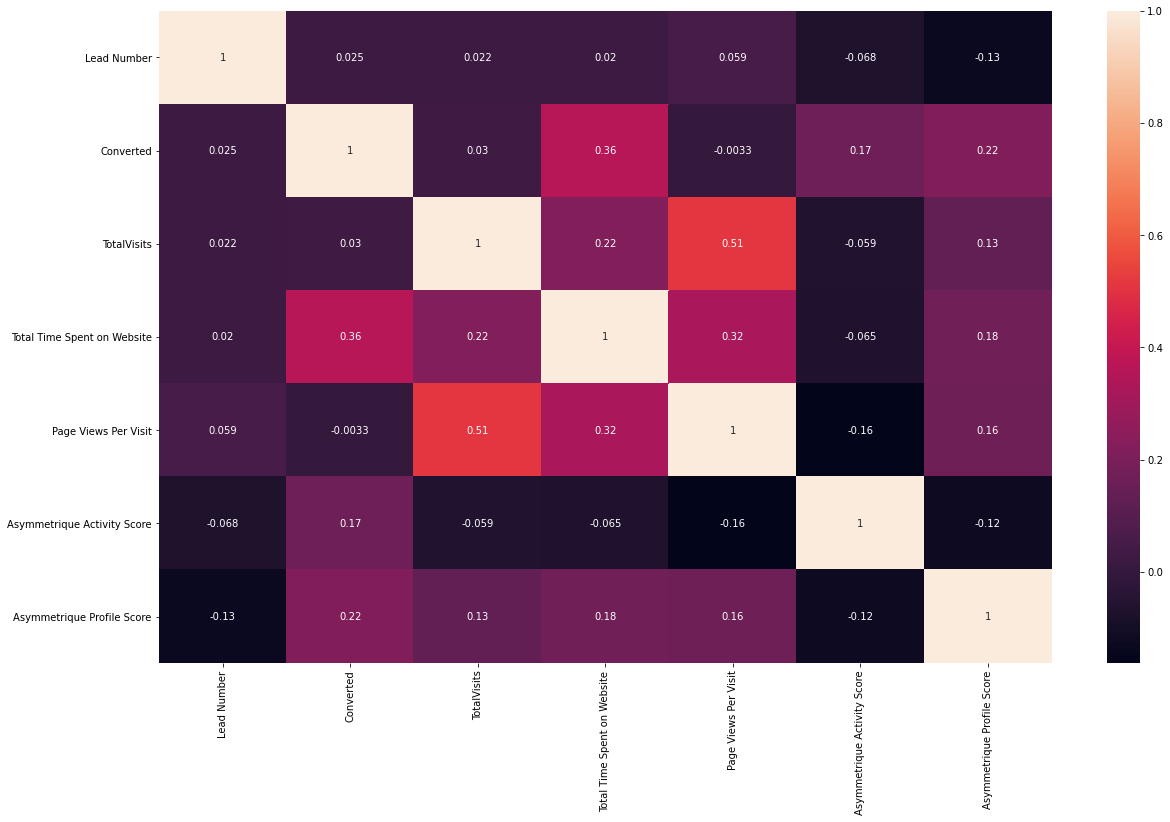

In [7]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,12))
sns.heatmap(conv_data.corr(),annot = True)
plt.show()

As per the preliminary study we can see that there is some correlation between Page ViewsPer Visit and TotalVisits. We can handle this later, But Page Views per Visti is already related to Total Visits, hence will drop this variable.

In [8]:
conv_data=conv_data.drop(['Page Views Per Visit'],1)

In [9]:
conv_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Cleaning the data

In [10]:
# Lets check the null values available in the data
conv_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [11]:
conv_data=conv_data.replace('Select',np.nan)

In [12]:
conv_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
# Lets check the null value percentage
round((conv_data.isnull().sum())/len(conv_data)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

###### We can see that there are quite a few variables where we have big percentage of null values, I will drop the variables which have more than 30% of null values.

In [14]:
#  Since Specialization seems to be important variable, hence we will not drop these variable.
conv_data= conv_data.drop(['How did you hear about X Education','Tags','City','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [15]:
conv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Last Activity                                  9137 

In [16]:
# Lets check the null value percentage again
round((conv_data.isnull().sum())/len(conv_data)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

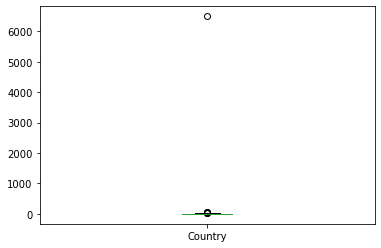

In [17]:
# Lets look at the variable where we have almost 30% null values
conv_data['Country'].value_counts().plot.box()

It appears that variable Country has huge number of outliers and if we try to drop the rows then our data might get affected, Hence we will drop the Variable Country.

In [18]:
conv_data=conv_data.drop(['Country'],1)

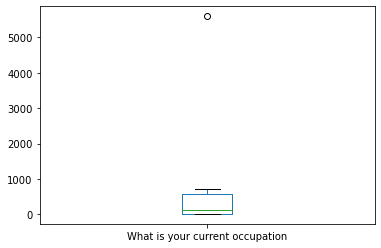

In [19]:
# Lets look at the variable where we have almost 30% null values
conv_data['What is your current occupation'].value_counts().plot.box()

In [20]:
conv_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

Even the variable What is your current occupation has huge numbers of outliers since the number of outliers is quite high it is better to drop this variable as well.


In [21]:
conv_data=conv_data.drop(['What is your current occupation'],1)

In [22]:
# Lets look at the variable where we have almost 30% null values
conv_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Even the variable What matters most to you in choosing a course has huge numbers of outliers since the number of outliers is quite high it is better to drop this variable as well.

In [23]:
conv_data=conv_data.drop(['What matters most to you in choosing a course'],1)

In [24]:
conv_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Specialization variable looks fine and it seems to be important variable so we can work with it. Lets drop all the rows that have null values.


In [25]:
conv_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,Page Visited on Website,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,Email Opened,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,Unreachable,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,Converted to Lead,...,No,No,No,No,No,No,No,No,No,Modified


In [26]:
round((conv_data.isnull().sum())/len(conv_data)*100,2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Last Activity                                1.11
Specialization                              36.58
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00


In [27]:
# now lets drop all the rows with missing values
conv_data=conv_data.dropna(axis=0, inplace=False)
conv_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,Unreachable,...,No,No,No,No,No,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,Email Opened,...,No,No,No,No,No,No,No,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,Email Opened,...,No,No,No,No,No,No,No,No,No,Email Opened


In [28]:
# lets check percentage of null values again
round((conv_data.isnull().sum())/len(conv_data)*100,2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [29]:
# lets check column types of data once again
conv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5792 entries, 2 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               5792 non-null   object 
 1   Lead Number                               5792 non-null   int64  
 2   Lead Origin                               5792 non-null   object 
 3   Lead Source                               5792 non-null   object 
 4   Do Not Email                              5792 non-null   object 
 5   Do Not Call                               5792 non-null   object 
 6   Converted                                 5792 non-null   int64  
 7   TotalVisits                               5792 non-null   float64
 8   Total Time Spent on Website               5792 non-null   int64  
 9   Last Activity                             5792 non-null   object 
 10  Specialization                      

Prospect ID column does not really have any impact, hence we can drop the variable.

In [30]:
conv_data=conv_data.drop(['Prospect ID'],1)

#### Now lets work on data preparation

In [31]:
conv_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,Email Opened,Business Administration,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,Unreachable,Media and Advertising,...,No,No,No,No,No,No,No,No,No,Modified
6,660673,Landing Page Submission,Google,No,No,1,2.0,1640,Email Opened,Supply Chain Management,...,No,No,No,No,No,No,No,No,No,Modified
8,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,Email Opened,IT Projects Management,...,No,No,No,No,No,No,No,No,Yes,Email Opened
9,660616,API,Google,No,No,0,4.0,58,Email Opened,Finance Management,...,No,No,No,No,No,No,No,No,No,Email Opened


In [113]:
conv_data['A free copy of Mastering The Interview'].value_counts()

0    2910
1    2882
Name: A free copy of Mastering The Interview, dtype: int64

#### Converting binary variable (Yes/No) to (1/0)

In [33]:
# List of variables to map

varlist =  [ 'Do Not Email','Digital Advertisement','Search','Do Not Call','Magazine','Newspaper Article','A free copy of Mastering The Interview','I agree to pay the amount through cheque','Get updates on DM Content','X Education Forums','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Newspaper','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

#Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

#Applying the function to the housing list
conv_data[varlist] = conv_data[varlist].apply(binary_map)

In [34]:
conv_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,Unreachable,Media and Advertising,...,0,0,0,0,0,0,0,0,0,Modified
6,660673,Landing Page Submission,Google,0,0,1,2.0,1640,Email Opened,Supply Chain Management,...,0,0,0,0,0,0,0,0,0,Modified
8,660624,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,Email Opened,IT Projects Management,...,0,0,0,0,0,0,0,0,1,Email Opened
9,660616,API,Google,0,0,0,4.0,58,Email Opened,Finance Management,...,0,0,0,0,0,0,0,0,0,Email Opened


In [35]:
conv_data.shape

(5792, 23)

In [36]:
conv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5792 entries, 2 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               5792 non-null   int64  
 1   Lead Origin                               5792 non-null   object 
 2   Lead Source                               5792 non-null   object 
 3   Do Not Email                              5792 non-null   int64  
 4   Do Not Call                               5792 non-null   int64  
 5   Converted                                 5792 non-null   int64  
 6   TotalVisits                               5792 non-null   float64
 7   Total Time Spent on Website               5792 non-null   int64  
 8   Last Activity                             5792 non-null   object 
 9   Specialization                            5792 non-null   object 
 10  Search                              

We have few categorical variables with multiple levels, we have to create dummy variables for them

In [37]:
# Creating dummy variable for some of the categorical variables  and droping the first one.

dummy1 = pd.get_dummies(conv_data[[ 'Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity']], drop_first=True)

In [38]:
conv_data=pd.concat([conv_data,dummy1], axis=1)

In [39]:
conv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5792 entries, 2 to 9239
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         5792 non-null   int64  
 1   Lead Origin                                         5792 non-null   object 
 2   Lead Source                                         5792 non-null   object 
 3   Do Not Email                                        5792 non-null   int64  
 4   Do Not Call                                         5792 non-null   int64  
 5   Converted                                           5792 non-null   int64  
 6   TotalVisits                                         5792 non-null   float64
 7   Total Time Spent on Website                         5792 non-null   int64  
 8   Last Activity                                       5792 non-null   object 
 9

In [40]:
# Since we already have created dummy variables so we do not need following variables.

conv_data= conv_data.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity'], axis=1)

In [41]:
conv_data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,660727,0,0,1,2.0,1532,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,660673,0,0,1,2.0,1640,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,660624,0,0,0,2.0,71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,660616,0,0,0,4.0,58,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Test-Train Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Putting feature variable to X
X = conv_data.drop(['Converted'], axis=1)

X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,660727,0,0,2.0,1532,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,660673,0,0,2.0,1640,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,660624,0,0,2.0,71,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,660616,0,0,4.0,58,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Putting response variable to y
y = conv_data['Converted']

y.head()

2    1
3    0
6    1
8    0
9    0
Name: Converted, dtype: int64

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3188,629483,0,0,-0.782652,-1.090099,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8278,586658,0,0,-0.069086,-0.398625,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8129,587777,0,0,0.466089,0.654011,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2393,636765,0,0,-0.247478,0.394482,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016,649334,0,0,-0.247478,-0.494815,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
# Checking the conversion rate

conv = (sum(conv_data['Converted'])/len(conv_data['Converted'].index))*100
conv

43.75

We have almost 43% conversion rate

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4054 entries, 3188 to 9020
Data columns (total 84 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         4054 non-null   int64  
 1   Do Not Email                                        4054 non-null   int64  
 2   Do Not Call                                         4054 non-null   int64  
 3   TotalVisits                                         4054 non-null   float64
 4   Total Time Spent on Website                         4054 non-null   float64
 5   Search                                              4054 non-null   int64  
 6   Magazine                                            4054 non-null   int64  
 7   Newspaper Article                                   4054 non-null   int64  
 8   X Education Forums                                  4054 non-null   int64  

#### Feature selection using RFE

In [50]:
import statsmodels.api as sm

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [52]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [53]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False])

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 42),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 57),
 ('Magazine', False, 69),
 ('Newspaper Article', False, 51),
 ('X Education Forums', False, 50),
 ('Newspaper', False, 63),
 ('Digital Advertisement', False, 61),
 ('Through Recommendations', False, 58),
 ('Receive More Updates About Our Courses', False, 70),
 ('Update me on Supply Chain Content', False, 67),
 ('Get updates on DM Content', False, 66),
 ('I agree to pay the amount through cheque', False, 64),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 5),
 ('Lead Source_NC_EDM', False, 47),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', 

In [55]:
col = X_train.columns[rfe.support_]

In [56]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
 

##### Assessing the model with StatsModels

In [57]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4038
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1902.8
Date:                Fri, 16 Jul 2021   Deviance:                       3805.6
Time:                        23:49:18   Pearson chi2:                 4.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2566      1.146     -1.969      0.049      -4.503      -0.010
Lead Number                             5.088e-06   1.81e-06      2.816      0.005    1.55e-06    8.63e-06
Do Not Email                              -1.3711      0.228     -6.007      0.000      -1.818      -0.924
Total Time Spent on Website                1.0536      0.044     24.069      0.000       0.968       1.139
A free copy of Mastering The Interview    -0.2045      0.095     -2.157      0.031      -0.390      -0.019
Lead Origin_Landing Page Submission       -1.3321      0.129    -10.362      0.000      -1.584      -1.080
Lead Origin_Lead Add Form                  1.8813      0.785      2.396      0.017       0.342       3.420
Lead Source_Direct Traffic                -0.1121      0.098     -1.138      0.255      -0.305       0.081
Lead Source_Reference                      1.4165      0.842      1.682      0.093      -0.234       3.067
Last Activity_Email Bounced               -0.5771      0.475     -1.214      0.225      -1.509       0.355
Last Activity_Email Opened                 0.7333      0.200      3.662      0.000       0.341       1.126
Last Activity_Page Visited on Website     -0.1708      0.198     -0.864      0.388      -0.558       0.217
Last Activity_SMS Sent                     0.7357      0.201      3.655      0.000       0.341       1.130
Last Notable Activity_Email Opened        -0.9337      0.252     -3.709      0.000      -1.427      -0.440
Last Notable Activity_Modified            -1.0396      0.189     -5.514      0.000      -1.409      -0.670
Last Notable Activity_SMS Sent             0.3925      0.257      1.526      0.127      -0.112       0.897
==========================================================================================================
"""

#### Checking VIF`s

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,23.20
5,Lead Origin_Lead Add Form,16.85
7,Lead Source_Reference,16.26
12,Last Notable Activity_Email Opened,12.76
14,Last Notable Activity_SMS Sent,9.98
9,Last Activity_Email Opened,9.86
4,Lead Origin_Landing Page Submission,9.01
11,Last Activity_SMS Sent,7.97
13,Last Notable Activity_Modified,5.74
3,A free copy of Mastering The Interview,2.82


We can see VIF`s for few of the variables are pretty high. We will drop the variable having highest VIF.

In [60]:
col = col.drop('Lead Number')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [61]:
# lets rebuild the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4039
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1906.8
Date:                Fri, 16 Jul 2021   Deviance:                       3813.5
Time:                        23:49:18   Pearson chi2:                 4.13e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.9226      0.200      4.617      0.000       0.531       1.314
Do Not Email                              -1.3957      0.228     -6.132      0.000      -1.842      -0.950
Total Time Spent on Website                1.0545      0.044     24.110      0.000       0.969       1.140
A free copy of Mastering The Interview    -0.2156      0.095     -2.278      0.023      -0.401      -0.030
Lead Origin_Landing Page Submission       -1.3244      0.129    -10.302      0.000      -1.576      -1.072
Lead Origin_Lead Add Form                  1.9338      0.786      2.459      0.014       0.392       3.475
Lead Source_Direct Traffic                -0.1468      0.098     -1.505      0.132      -0.338       0.044
Lead Source_Reference                      1.3648      0.843      1.619      0.105      -0.287       3.017
Last Activity_Email Bounced               -0.5789      0.475     -1.218      0.223      -1.510       0.352
Last Activity_Email Opened                 0.7259      0.200      3.628      0.000       0.334       1.118
Last Activity_Page Visited on Website     -0.1796      0.197     -0.910      0.363      -0.567       0.207
Last Activity_SMS Sent                     0.7452      0.201      3.711      0.000       0.352       1.139
Last Notable Activity_Email Opened        -0.9350      0.252     -3.715      0.000      -1.428      -0.442
Last Notable Activity_Modified            -1.0538      0.188     -5.594      0.000      -1.423      -0.685
Last Notable Activity_SMS Sent             0.3120      0.255      1.223      0.221      -0.188       0.812
==========================================================================================================
"""

In [62]:
# lets check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,16.70
6,Lead Source_Reference,16.26
11,Last Notable Activity_Email Opened,10.13
8,Last Activity_Email Opened,9.68
13,Last Notable Activity_SMS Sent,7.97
10,Last Activity_SMS Sent,7.86
3,Lead Origin_Landing Page Submission,7.11
12,Last Notable Activity_Modified,3.37
2,A free copy of Mastering The Interview,2.79
5,Lead Source_Direct Traffic,2.46


In [63]:
col = col.drop('Lead Origin_Lead Add Form')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [64]:
# lets rebuild the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4040
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1911.0
Date:                Fri, 16 Jul 2021   Deviance:                       3822.0
Time:                        23:49:18   Pearson chi2:                 4.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.9709      0.199      4.871      0.000       0.580       1.362
Do Not Email                              -1.3962      0.228     -6.133      0.000      -1.842      -0.950
Total Time Spent on Website                1.0497      0.044     24.042      0.000       0.964       1.135
A free copy of Mastering The Interview    -0.2184      0.095     -2.311      0.021      -0.404      -0.033
Lead Origin_Landing Page Submission       -1.3826      0.127    -10.863      0.000      -1.632      -1.133
Lead Source_Direct Traffic                -0.1467      0.098     -1.505      0.132      -0.338       0.044
Lead Source_Reference                      3.2291      0.347      9.311      0.000       2.549       3.909
Last Activity_Email Bounced               -0.5687      0.475     -1.196      0.232      -1.500       0.363
Last Activity_Email Opened                 0.7705      0.199      3.875      0.000       0.381       1.160
Last Activity_Page Visited on Website     -0.1706      0.198     -0.864      0.388      -0.558       0.217
Last Activity_SMS Sent                     0.7647      0.201      3.812      0.000       0.372       1.158
Last Notable Activity_Email Opened        -0.9651      0.251     -3.847      0.000      -1.457      -0.473
Last Notable Activity_Modified            -1.0568      0.188     -5.607      0.000      -1.426      -0.687
Last Notable Activity_SMS Sent             0.3014      0.255      1.182      0.237      -0.199       0.801
==========================================================================================================
"""

In [65]:
# lets check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Email Opened,10.13
7,Last Activity_Email Opened,9.62
12,Last Notable Activity_SMS Sent,7.96
9,Last Activity_SMS Sent,7.85
3,Lead Origin_Landing Page Submission,6.99
11,Last Notable Activity_Modified,3.35
2,A free copy of Mastering The Interview,2.79
4,Lead Source_Direct Traffic,2.46
0,Do Not Email,1.88
6,Last Activity_Email Bounced,1.88


In [66]:
col = col.drop('Last Notable Activity_Email Opened')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [67]:
# lets rebuild the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4041
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1918.3
Date:                Fri, 16 Jul 2021   Deviance:                       3836.7
Time:                        23:49:18   Pearson chi2:                 4.15e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.5923      0.173      3.415      0.001       0.252       0.932
Do Not Email                              -1.3741      0.227     -6.061      0.000      -1.818      -0.930
Total Time Spent on Website                1.0523      0.044     24.151      0.000       0.967       1.138
A free copy of Mastering The Interview    -0.2198      0.094     -2.332      0.020      -0.405      -0.035
Lead Origin_Landing Page Submission       -1.3892      0.127    -10.933      0.000      -1.638      -1.140
Lead Source_Direct Traffic                -0.1433      0.097     -1.472      0.141      -0.334       0.048
Lead Source_Reference                      3.2880      0.347      9.480      0.000       2.608       3.968
Last Activity_Email Bounced               -0.5483      0.469     -1.169      0.242      -1.467       0.371
Last Activity_Email Opened                 0.2517      0.147      1.712      0.087      -0.037       0.540
Last Activity_Page Visited on Website     -0.0179      0.191     -0.094      0.925      -0.392       0.356
Last Activity_SMS Sent                     0.6089      0.195      3.125      0.002       0.227       0.991
Last Notable Activity_Modified            -0.5209      0.126     -4.121      0.000      -0.769      -0.273
Last Notable Activity_SMS Sent             0.8392      0.213      3.933      0.000       0.421       1.257
==========================================================================================================
"""

In [68]:
# lets check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,7.36
11,Last Notable Activity_SMS Sent,6.90
3,Lead Origin_Landing Page Submission,6.36
2,A free copy of Mastering The Interview,2.78
7,Last Activity_Email Opened,2.69
4,Lead Source_Direct Traffic,2.46
10,Last Notable Activity_Modified,2.10
0,Do Not Email,1.88
6,Last Activity_Email Bounced,1.86
5,Lead Source_Reference,1.41


In [69]:
col = col.drop('Last Activity_SMS Sent')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [70]:
# lets rebuild the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4042
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1923.2
Date:                Fri, 16 Jul 2021   Deviance:                       3846.4
Time:                        23:49:18   Pearson chi2:                 4.16e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.7113      0.168      4.234      0.000       0.382       1.041
Do Not Email                              -1.3528      0.226     -5.978      0.000      -1.796      -0.909
Total Time Spent on Website                1.0528      0.044     24.197      0.000       0.968       1.138
A free copy of Mastering The Interview    -0.2214      0.094     -2.351      0.019      -0.406      -0.037
Lead Origin_Landing Page Submission       -1.3613      0.126    -10.782      0.000      -1.609      -1.114
Lead Source_Direct Traffic                -0.1413      0.097     -1.452      0.146      -0.332       0.049
Lead Source_Reference                      3.3424      0.347      9.643      0.000       2.663       4.022
Last Activity_Email Bounced               -0.7577      0.463     -1.637      0.102      -1.665       0.149
Last Activity_Email Opened                 0.0983      0.137      0.719      0.472      -0.170       0.366
Last Activity_Page Visited on Website     -0.1936      0.181     -1.072      0.284      -0.548       0.160
Last Notable Activity_Modified            -0.4532      0.124     -3.665      0.000      -0.696      -0.211
Last Notable Activity_SMS Sent             1.3022      0.155      8.380      0.000       0.998       1.607
==========================================================================================================
"""

In [71]:
# lets check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,6.11
2,A free copy of Mastering The Interview,2.78
7,Last Activity_Email Opened,2.52
4,Lead Source_Direct Traffic,2.46
10,Last Notable Activity_SMS Sent,2.28
0,Do Not Email,1.88
9,Last Notable Activity_Modified,1.86
6,Last Activity_Email Bounced,1.78
5,Lead Source_Reference,1.37
8,Last Activity_Page Visited on Website,1.31


In [72]:
col = col.drop('Lead Origin_Landing Page Submission')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [73]:
# lets rebuild the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4043
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.5
Date:                Fri, 16 Jul 2021   Deviance:                       3968.9
Time:                        23:49:19   Pearson chi2:                 4.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2499      0.140     -1.784      0.074      -0.524       0.025
Do Not Email                              -1.4189      0.221     -6.424      0.000      -1.852      -0.986
Total Time Spent on Website                1.0052      0.042     23.839      0.000       0.923       1.088
A free copy of Mastering The Interview    -0.3394      0.092     -3.708      0.000      -0.519      -0.160
Lead Source_Direct Traffic                -0.3698      0.093     -3.965      0.000      -0.553      -0.187
Lead Source_Reference                      4.3026      0.335     12.827      0.000       3.645       4.960
Last Activity_Email Bounced               -0.8337      0.462     -1.805      0.071      -1.739       0.072
Last Activity_Email Opened                 0.0485      0.134      0.361      0.718      -0.215       0.311
Last Activity_Page Visited on Website     -0.2420      0.175     -1.385      0.166      -0.585       0.101
Last Notable Activity_Modified            -0.4555      0.121     -3.752      0.000      -0.693      -0.218
Last Notable Activity_SMS Sent             1.2262      0.153      8.040      0.000       0.927       1.525
==========================================================================================================
"""

In [74]:
# lets check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,A free copy of Mastering The Interview,2.61
3,Lead Source_Direct Traffic,2.35
0,Do Not Email,1.86
5,Last Activity_Email Bounced,1.77
6,Last Activity_Email Opened,1.44
9,Last Notable Activity_SMS Sent,1.40
8,Last Notable Activity_Modified,1.39
4,Lead Source_Reference,1.19
7,Last Activity_Page Visited on Website,1.19
1,Total Time Spent on Website,1.09


VIFs look good but we have few variables which have very high p-value

In [75]:
# lets drop the variable with high p-value
col = col.drop('Last Activity_Email Opened')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [76]:
# lets rebuild the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4044
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.5
Date:                Fri, 16 Jul 2021   Deviance:                       3969.1
Time:                        23:49:19   Pearson chi2:                 4.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2067      0.073     -2.840      0.005      -0.349      -0.064
Do Not Email                              -1.4255      0.220     -6.476      0.000      -1.857      -0.994
Total Time Spent on Website                1.0056      0.042     23.857      0.000       0.923       1.088
A free copy of Mastering The Interview    -0.3414      0.091     -3.736      0.000      -0.520      -0.162
Lead Source_Direct Traffic                -0.3679      0.093     -3.951      0.000      -0.550      -0.185
Lead Source_Reference                      4.3058      0.335     12.841      0.000       3.649       4.963
Last Activity_Email Bounced               -0.8526      0.459     -1.857      0.063      -1.753       0.047
Last Activity_Page Visited on Website     -0.2724      0.153     -1.778      0.075      -0.573       0.028
Last Notable Activity_Modified            -0.4823      0.096     -5.021      0.000      -0.671      -0.294
Last Notable Activity_SMS Sent             1.1836      0.097     12.238      0.000       0.994       1.373
==========================================================================================================
"""

We still have some variables with high p-value


In [77]:
# lets drop the variable with high p-value
col = col.drop('Last Activity_Page Visited on Website')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [78]:
# lets rebuild the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4045
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.2
Date:                Fri, 16 Jul 2021   Deviance:                       3972.3
Time:                        23:49:19   Pearson chi2:                 4.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2299      0.072     -3.211      0.001      -0.370      -0.090
Do Not Email                              -1.4614      0.218     -6.702      0.000      -1.889      -1.034
Total Time Spent on Website                1.0039      0.042     23.845      0.000       0.921       1.086
A free copy of Mastering The Interview    -0.3420      0.091     -3.747      0.000      -0.521      -0.163
Lead Source_Direct Traffic                -0.3692      0.093     -3.970      0.000      -0.552      -0.187
Lead Source_Reference                      4.3205      0.335     12.881      0.000       3.663       4.978
Last Activity_Email Bounced               -0.7892      0.458     -1.724      0.085      -1.686       0.108
Last Notable Activity_Modified            -0.4935      0.096     -5.151      0.000      -0.681      -0.306
Last Notable Activity_SMS Sent             1.2099      0.096     12.652      0.000       1.022       1.397
==========================================================================================================
"""

We still have 1 variable having high p-value, we will have to drop the variable.

In [79]:
# lets drop the variable with high p-value
col = col.drop('Last Activity_Email Bounced')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Reference', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [80]:
# lets rebuild the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4046
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.8
Date:                Fri, 16 Jul 2021   Deviance:                       3975.6
Time:                        23:49:19   Pearson chi2:                 4.13e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2321      0.072     -3.242      0.001      -0.372      -0.092
Do Not Email                              -1.6439      0.198     -8.320      0.000      -2.031      -1.257
Total Time Spent on Website                1.0029      0.042     23.830      0.000       0.920       1.085
A free copy of Mastering The Interview    -0.3399      0.091     -3.727      0.000      -0.519      -0.161
Lead Source_Direct Traffic                -0.3716      0.093     -3.997      0.000      -0.554      -0.189
Lead Source_Reference                      4.3358      0.336     12.911      0.000       3.678       4.994
Last Notable Activity_Modified            -0.5039      0.096     -5.271      0.000      -0.691      -0.317
Last Notable Activity_SMS Sent             1.2230      0.095     12.808      0.000       1.036       1.410
==========================================================================================================
"""

In [81]:
# lets check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,A free copy of Mastering The Interview,2.35
3,Lead Source_Direct Traffic,2.25
5,Last Notable Activity_Modified,1.34
6,Last Notable Activity_SMS Sent,1.28
0,Do Not Email,1.16
4,Lead Source_Reference,1.12
1,Total Time Spent on Website,1.08


Now our model looks good. We have variables which have less than 0.05 p-value and also lower VIF.

In [82]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3188    0.985706
8278    0.243092
8129    0.781632
2393    0.540800
1016    0.225784
1724    0.164693
48      0.598791
8842    0.019789
7812    0.327996
3008    0.710352
dtype: float64

In [83]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98570557, 0.24309152, 0.78163163, 0.54079972, 0.22578367,
       0.16469326, 0.59879088, 0.01978923, 0.32799588, 0.71035238])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [84]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,0,0.985706,3188
1,0,0.243092,8278
2,0,0.781632,8129
3,1,0.540800,2393
4,0,0.225784,1016


###### Creating new column 'predicted' with 1 if Churn_Prob > 0.8 else 0

In [85]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.985706,3188,1
1,0,0.243092,8278,0
2,0,0.781632,8129,0
3,1,0.540800,2393,0
4,0,0.225784,1016,0


In [86]:
from sklearn import metrics

In [87]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2174   92]
 [1196  592]]


In [88]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.6822890971879625


In [89]:
# Also understanding other metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.33109619686800895

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.9593998234774934

In [92]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04060017652250662


In [93]:
# positive predictive value 
print (TP / float(TP+FP))

0.8654970760233918


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6451038575667656


In [95]:
# lets also have a look at Precision and recall
# Precision is
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8654970760233918

In [96]:
# recall is 
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.33109619686800895

##### Our model looks good at this stage. Lets test our model on test data set

In [97]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website']])

X_test.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7614,591384,1,0,1.185647,-0.001599,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7388,592783,0,0,-0.078688,-0.747852,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7657,591072,0,0,-0.500132,-0.962334,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,649951,0,0,-0.289410,-0.400428,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6875,596830,0,0,-0.078688,0.921911,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [98]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Reference,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
7614,1,-0.001599,0,0,0,0,1
7388,0,-0.747852,1,0,0,0,1
7657,0,-0.962334,1,1,0,0,0
965,0,-0.400428,1,1,0,1,0
6875,0,0.921911,1,0,0,1,0


In [99]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [100]:
y_test_pred = res.predict(X_test_sm)

In [101]:
y_test_pred[:10]

7614    0.341954
7388    0.475265
7657    0.129120
965     0.135971
6875    0.462240
3184    0.203755
8969    0.240876
8061    0.688660
2949    0.144116
8980    0.825787
dtype: float64

In [102]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [103]:
# Let's see the head
y_pred_1.head()

,0
7614,0.341954
7388,0.475265
7657,0.129120
965,0.135971
6875,0.462240


In [104]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [105]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [106]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
y_pred_final.head()

,Converted,LeadID,0
0,0,7614,0.341954
1,0,7388,0.475265
2,0,7657,0.129120
3,0,965,0.135971
4,0,6875,0.462240


In [109]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [110]:
# Let's see the head of y_pred_final
y_pred_final.head(10)

,Converted,LeadID,Conv_Prob
0,0,7614,0.341954
1,0,7388,0.475265
2,0,7657,0.129120
3,0,965,0.135971
4,0,6875,0.462240
5,0,3184,0.203755
6,0,8969,0.240876
7,1,8061,0.688660
8,0,2949,0.144116
9,1,8980,0.825787


Now lets add lead score to the dataframe

In [111]:
y_pred_final['Lead Score']=y_pred_final['Conv_Prob']*100

In [112]:
y_pred_final.head(10)

,Converted,LeadID,Conv_Prob,Lead Score
0,0,7614,0.341954,34.195413
1,0,7388,0.475265,47.526478
2,0,7657,0.129120,12.912042
3,0,965,0.135971,13.597140
4,0,6875,0.462240,46.224032
5,0,3184,0.203755,20.375452
6,0,8969,0.240876,24.087564
7,1,8061,0.688660,68.865986
8,0,2949,0.144116,14.411604
9,1,8980,0.825787,82.578667


In [115]:
y_pred_final['predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_pred_final.head()

,Converted,LeadID,Conv_Prob,Lead Score,predicted
0,0,7614,0.341954,34.195413,0
1,0,7388,0.475265,47.526478,0
2,0,7657,0.129120,12.912042,0
3,0,965,0.135971,13.597140,0
4,0,6875,0.462240,46.224032,0


#### Evaluation Metrics


In [116]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted))

0.6962025316455697


In [117]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
print(confusion)

[[955  37]
 [491 255]]


In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# lets have a look at Precision and recall
# Precision is
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8732876712328768

In [120]:
# recall is 
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.3418230563002681

##### Now we have a model with lead scores which can be used by the companies to target potential leads.